In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, log_loss

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("titanic_data.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DAF85CC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028DAFF485C0>]], dtype=object)

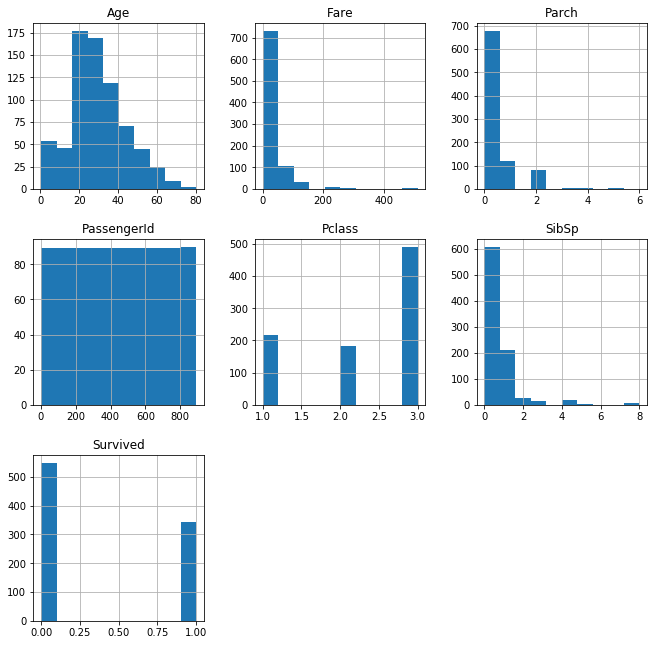

In [7]:
df[df.dtypes[(df.dtypes == "float64") | (df.dtypes == "int64")].index.values].hist(figsize=[11,11])

In [9]:
#Impute Missing Age with mean
df["Age"].fillna(df.Age.mean(),inplace=True)

In [13]:
#Drop Passenger Id
df = df.drop(['PassengerId'],axis=1)

In [14]:
numeric_variables= list(df.dtypes[df.dtypes != "object"].index)

X = df[numeric_variables] 
y = df["Survived"]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30,stratify=y)

In [21]:
#Baseline Model

knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)

scores = cross_val_score(knn, X_train,y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())


[ 0.79365079  0.68253968  0.82539683  0.73015873  0.83870968  0.80645161
  0.75806452  0.80645161  0.80645161  0.73770492]
0.778557998204


In [25]:
pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.76865671641791045

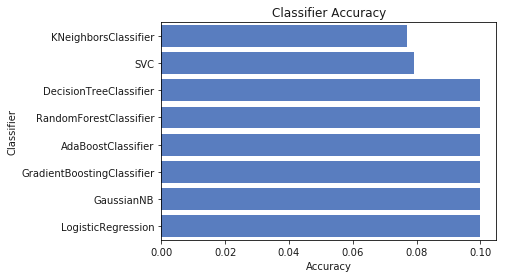

In [30]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [34]:
log.sort_values('Accuracy',ascending=False)

,Classifier,Accuracy
0,DecisionTreeClassifier,0.100000
0,RandomForestClassifier,0.100000
0,AdaBoostClassifier,0.100000
0,GradientBoostingClassifier,0.100000
0,GaussianNB,0.100000
0,LogisticRegression,0.100000
0,SVC,0.079104
0,KNeighborsClassifier,0.076866


In [35]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [49]:
import itertools
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print("Accuracy: {:.2} (+/- {:.2}) [{}]".format(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)

Accuracy: 1.0 (+/- 0.0) [Decision Tree]
Accuracy: 0.79 (+/- 0.034) [K-NN]
Accuracy: 1.0 (+/- 0.0) [Bagging Tree]
Accuracy: 0.87 (+/- 0.04) [Bagging K-NN]


([0.016129032258064516,
  0.0080645161290322578,
  0.043010752688172046,
  0.0080321285140562242,
  0.0064308681672025723,
  0.0053619302949061663,
  0.027522935779816515,
  0.014056224899598393,
  0.01607142857142857,
  0.006420545746388443],
 [0.23134328358208955,
  0.11940298507462686,
  0.26119402985074625,
  0.21641791044776118,
  0.10820895522388059,
  0.093283582089552244,
  0.20149253731343283,
  0.13059701492537312,
  0.13059701492537312,
  0.14925373134328357])

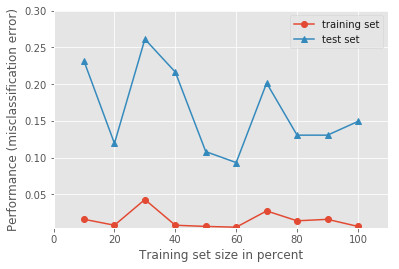

In [54]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging2
                     , print_model=False, style='ggplot')

In [78]:
#Ensemble Size
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
num_est = list(map(int, np.linspace(1,100,20)))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=bagging1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

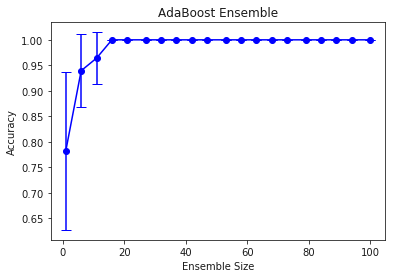

In [79]:
plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1) 
                                                                                                                                   
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()